In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight 

In [3]:
data = pd.read_csv(r"Surgical-deepnet.csv") 

In [4]:
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.info())
print(data['complication'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

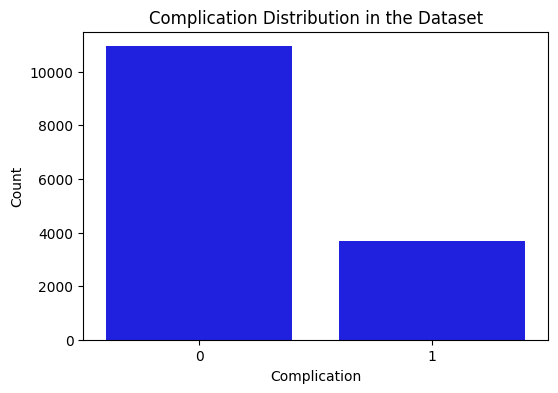

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='complication', data=data, color='blue')
plt.title('Complication Distribution in the Dataset')
plt.xlabel('Complication')
plt.ylabel('Count')
plt.show()

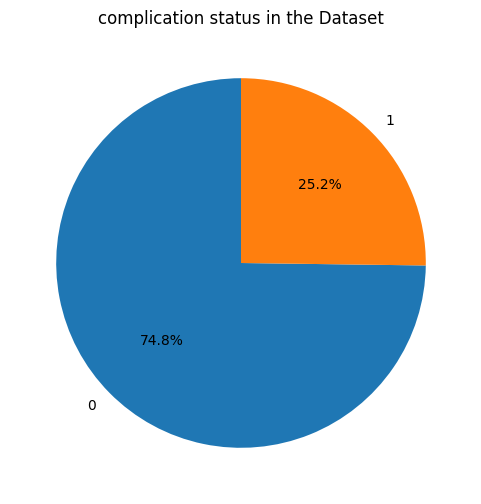

In [7]:
plt.figure(figsize=(6, 6))
class_counts = data['complication'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('complication status in the Dataset')
plt.show()

In [8]:
X = data.drop('complication', axis=1)
y = data['complication']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [9]:
def evaluate_model(X_train, y_train, X_test, y_test, class_weights=None):
    model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob)) 

In [10]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train) 
print("Random Undersampling:")
evaluate_model(X_rus, y_rus, X_test, y_test)

X_train shape: (11708, 24)
y_train shape: (11708,)
Random Undersampling:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2237
           1       0.56      0.82      0.67       690

    accuracy                           0.81      2927
   macro avg       0.75      0.81      0.77      2927
weighted avg       0.85      0.81      0.82      2927

AUC: 0.8971014492753623


In [11]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train) 
print("Random Oversampling:")
evaluate_model(X_ros, y_ros, X_test, y_test)

Random Oversampling:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2237
           1       0.75      0.68      0.71       690

    accuracy                           0.87      2927
   macro avg       0.83      0.80      0.81      2927
weighted avg       0.87      0.87      0.87      2927

AUC: 0.9101054077342197


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("SMOTE:")
evaluate_model(X_smote, y_smote, X_test, y_test)

SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2237
           1       0.70      0.69      0.70       690

    accuracy                           0.86      2927
   macro avg       0.80      0.80      0.80      2927
weighted avg       0.86      0.86      0.86      2927

AUC: 0.8970803936431427


In [13]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 
print("Tomek Links:")
evaluate_model(X_tl, y_tl, X_test, y_test)

Tomek Links:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2237
           1       0.77      0.62      0.69       690

    accuracy                           0.87      2927
   macro avg       0.83      0.78      0.80      2927
weighted avg       0.86      0.87      0.86      2927

AUC: 0.9055240260960267


In [14]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights)) 
print("Class Weights:")
evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict) 

Class Weights:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2237
           1       0.81      0.59      0.68       690

    accuracy                           0.87      2927
   macro avg       0.85      0.77      0.80      2927
weighted avg       0.87      0.87      0.86      2927

AUC: 0.9112595803126599
